# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**



```
# This is formatted as code
```

## Name: Shruti Agarwal

## UNI: sa4136

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [69]:
## YOUR CODE HERE

df = pd.read_csv("data.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**1.2: Are there any missing values in the dataset?**

In [70]:
## YOUR CODE HERE
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_On_Time        0
dtype: int64

In [71]:
print("No there are no null values.")

No there are no null values.


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**


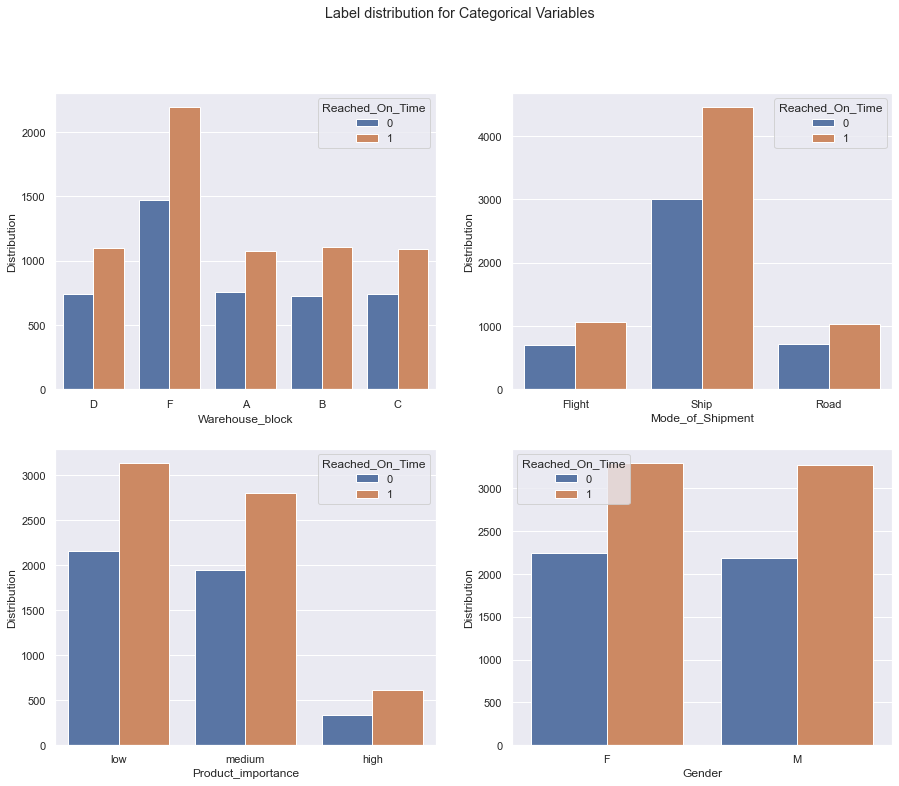

In [72]:
## YOUR CODE HERE

sns.set()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))


gfg = sns.barplot(x = 'Warehouse_block', y = 'ID', hue = 'Reached_On_Time', estimator = np.count_nonzero, data = df, ax=axes[0,0])
gfg.set_ylabel( "Distribution")
gfg = sns.barplot(x = 'Mode_of_Shipment', y = 'ID', hue = 'Reached_On_Time', estimator = np.count_nonzero, data = df, ax = axes[0,1])
gfg.set_ylabel( "Distribution")
gfg = sns.barplot(x = 'Product_importance', y = 'ID', hue = 'Reached_On_Time', estimator = np.count_nonzero, data = df, ax = axes[1,0])
gfg.set_ylabel( "Distribution")
gfg = sns.barplot(x = 'Gender', y = 'ID', hue = 'Reached_On_Time', estimator = np.count_nonzero, data = df, ax = axes[1,1])
gfg.set_ylabel( "Distribution")

fig.suptitle("Label distribution for Categorical Variables")
plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**


In [73]:
## YOUR CODE HERE
df.groupby('Reached_On_Time').count()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Reached_On_Time,,,,,,,,,,,
0,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436
1,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563


In [74]:
print("The data is skewed towards class 1")

The data is skewed towards class 1


**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [75]:
print("Since this is an imbalanced dataset, I've used stratified splitting.")

Since this is an imbalanced dataset, I've used stratified splitting.


In [76]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Reached_On_Time'])
y = df['Reached_On_Time']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

In [77]:
# from sklearn.preprocessing import StandardScaler
# # scaler = StandardScaler()

# col_names = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# features = X_train[col_names]
# scaler = StandardScaler()
# features = scaler.fit_transform(features.values)
# X_train[col_names] = features
# X_train


In [78]:
# col_names = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# features2 = X_test[col_names]
# # scaler = StandardScaler()
# features2 = scaler.transform(features2.values)
# X_test[col_names] = features2
# X_test

**1.6: Would you drop any column? Justify your reasoning.** 

**Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**



In [79]:
## YOUR CODE HERE
features = X_dev.select_dtypes(include = ['object'])
X_dev = pd.get_dummies(X_dev, columns = features.columns)
X_test = pd.get_dummies(X_test, columns = features.columns)

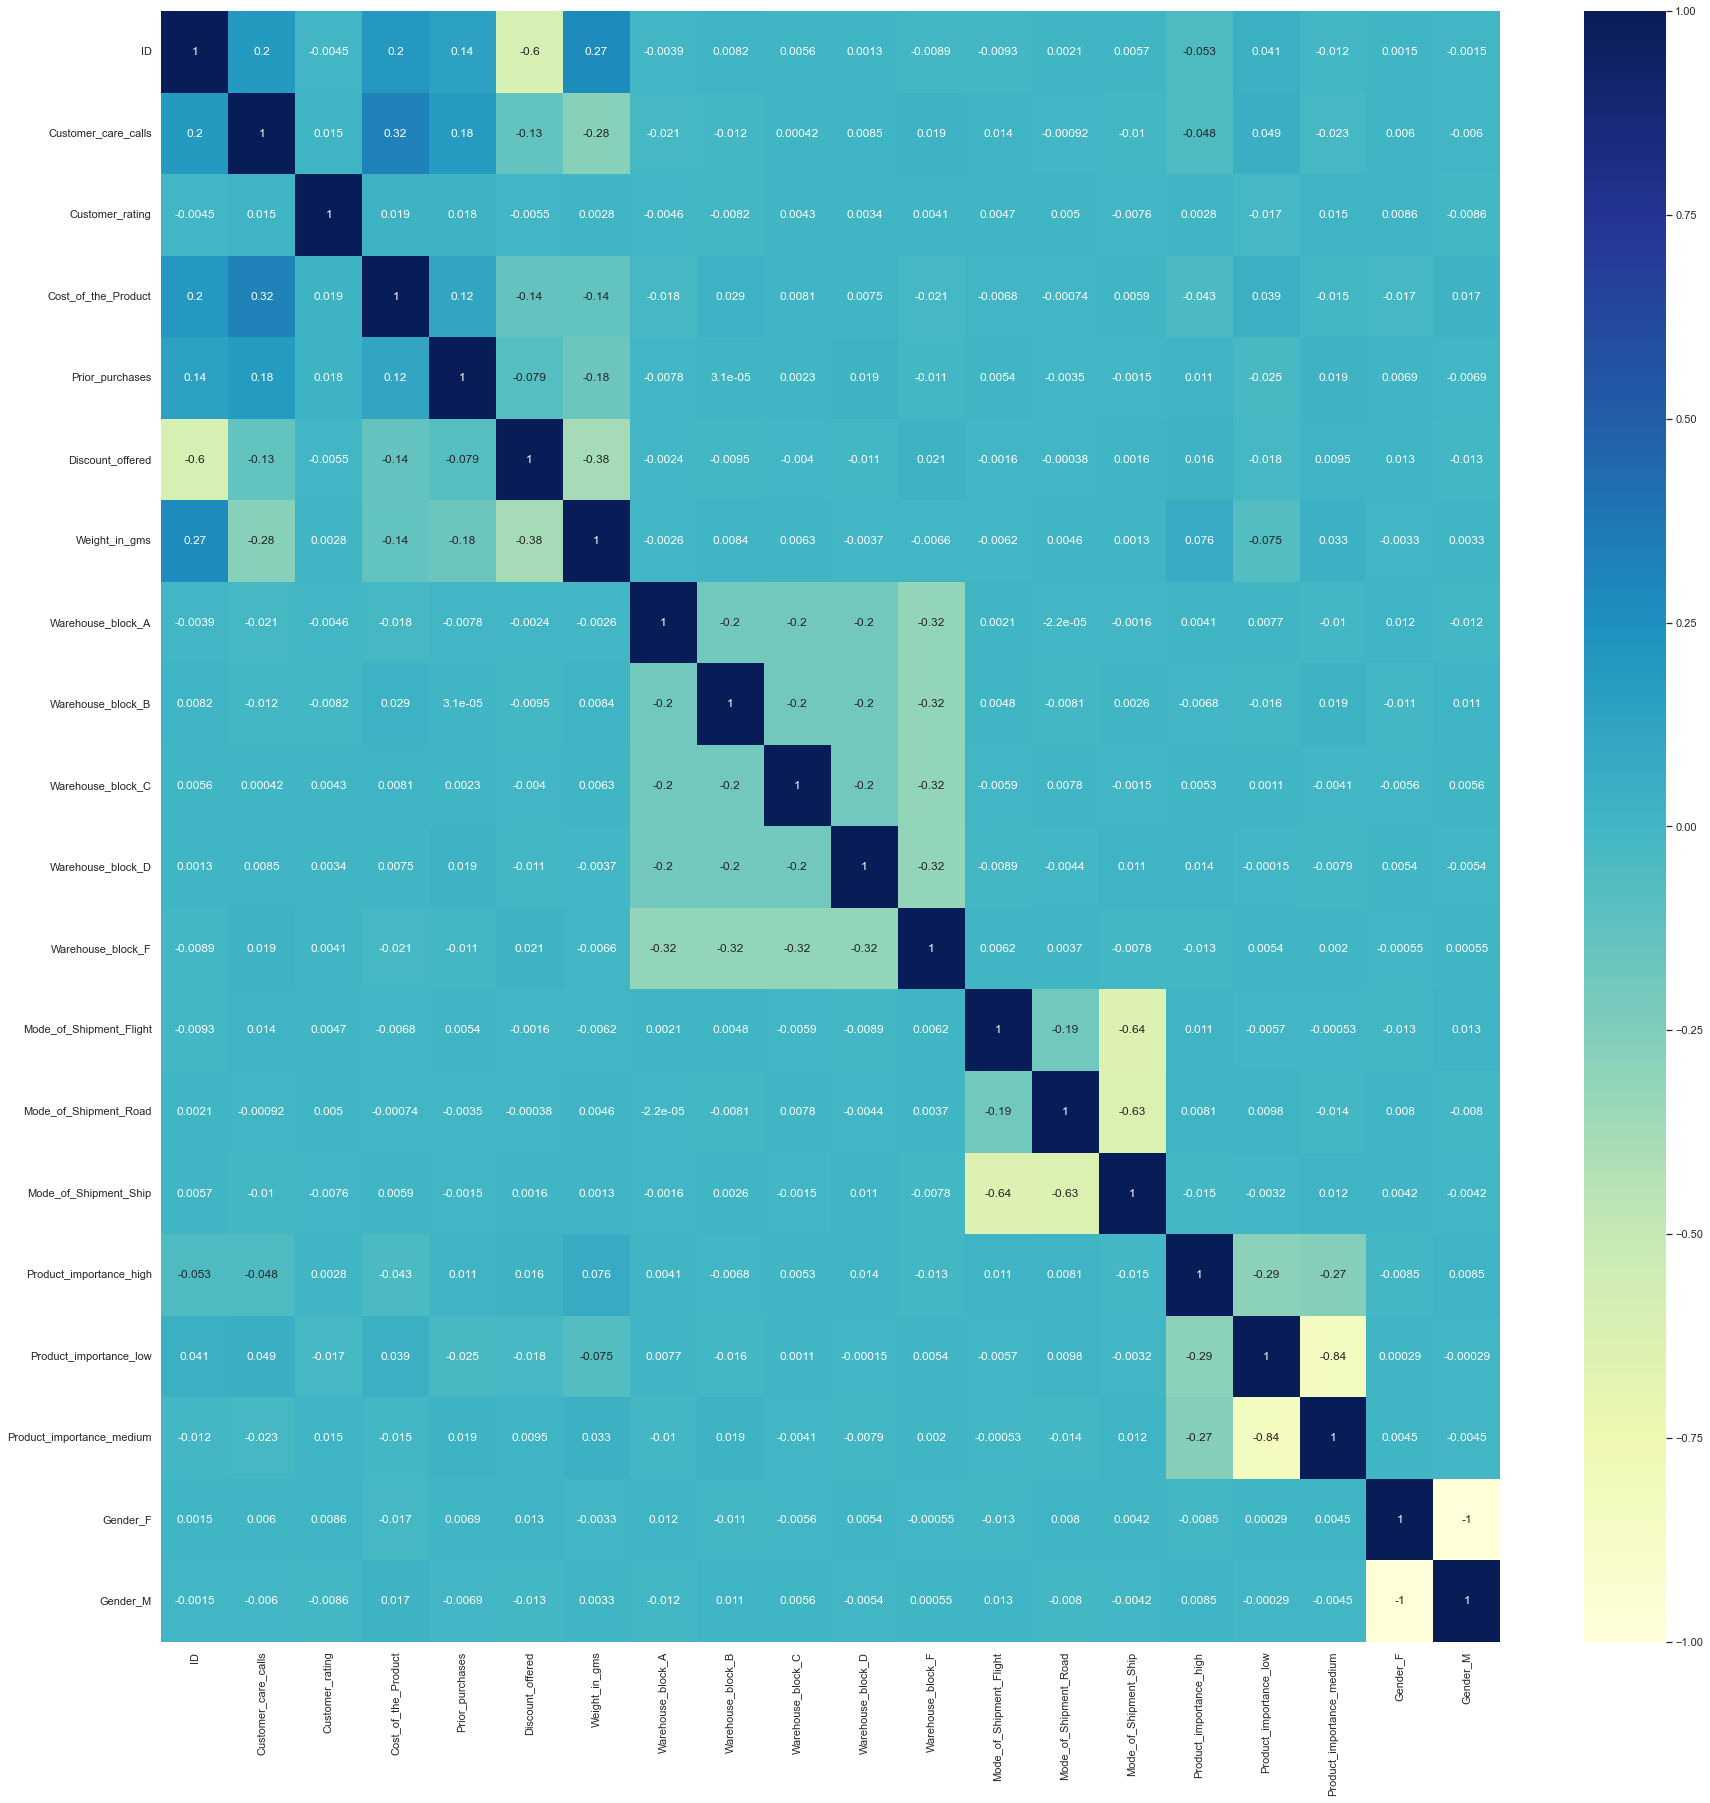

In [80]:
# Checking for highly correlated features

plt.figure(figsize = [30, 30]) 
dataplot = sns.heatmap(X_dev.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [81]:
print("Columns Gender_F and Gender_M have high correlation and so we'll drop one of these.")

Columns Gender_F and Gender_M have high correlation and so we'll drop one of these.


In [82]:
corr_matrix = X_dev.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
X_dev.drop(to_drop, axis=1, inplace=True)

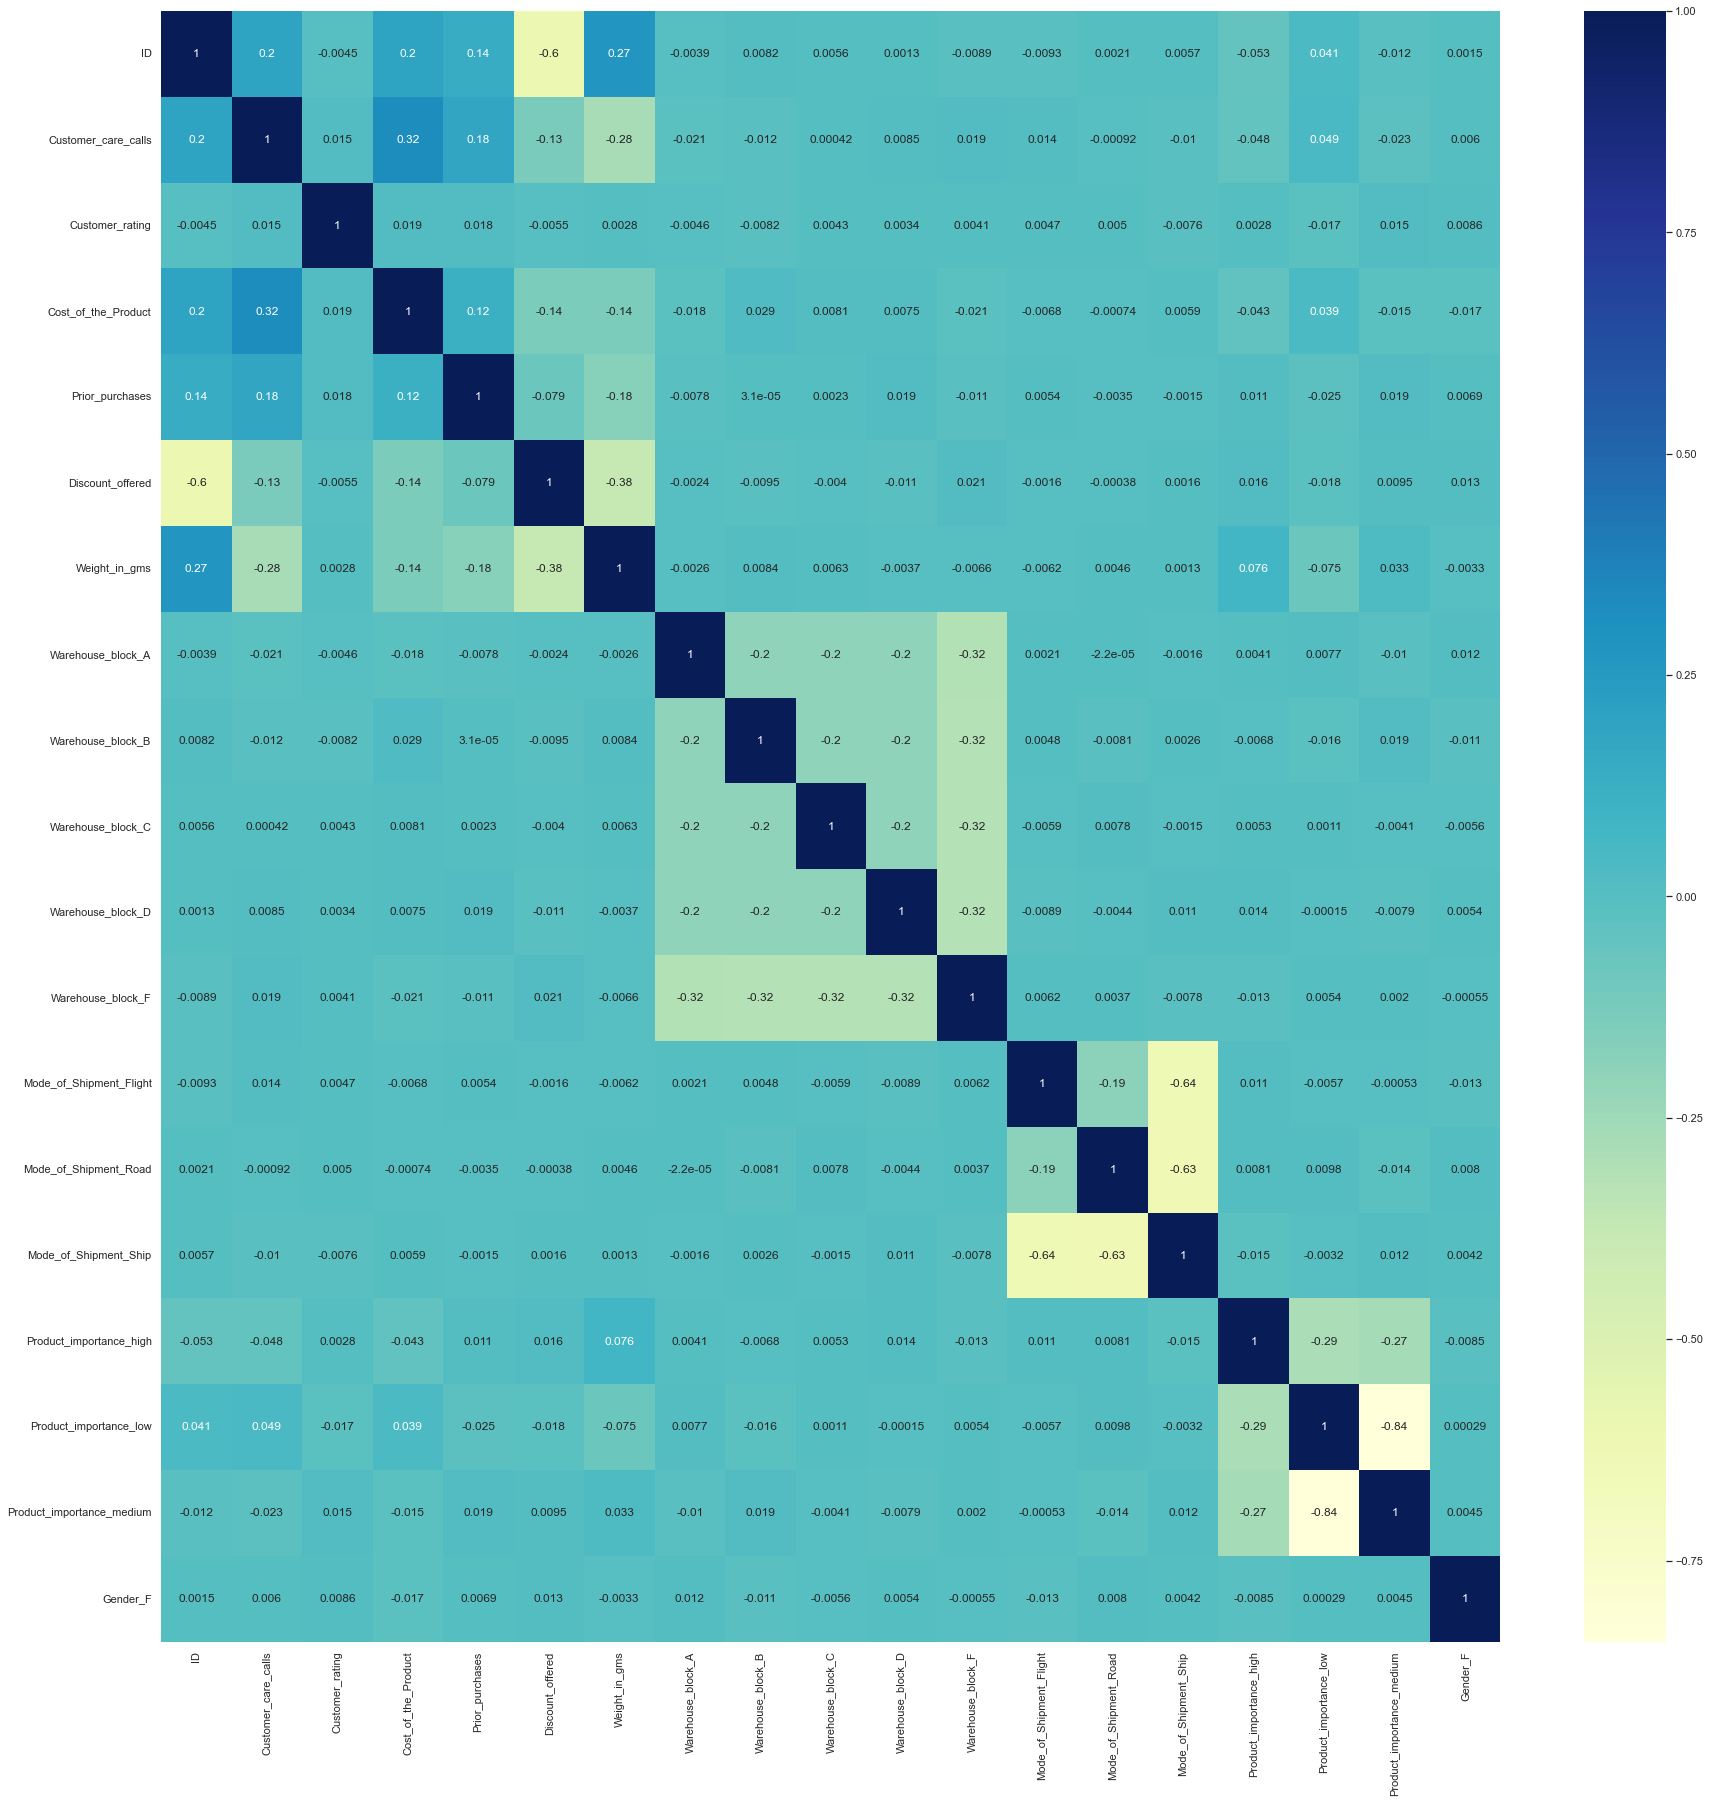

In [83]:
plt.figure(figsize = [30, 30]) 
dataplot = sns.heatmap(X_dev.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [84]:
corr_matrix = X_test.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
X_test.drop(to_drop, axis=1, inplace=True)

**1.7: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [85]:
## YOUR CODE HERE

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_dev,y_dev)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6527272727272727

In [86]:
from sklearn.metrics import f1_score

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  0.6527272727272727
F1 score:  0.7103866565579986


**1.8: Visualize the trained tree until the max_depth 8.**

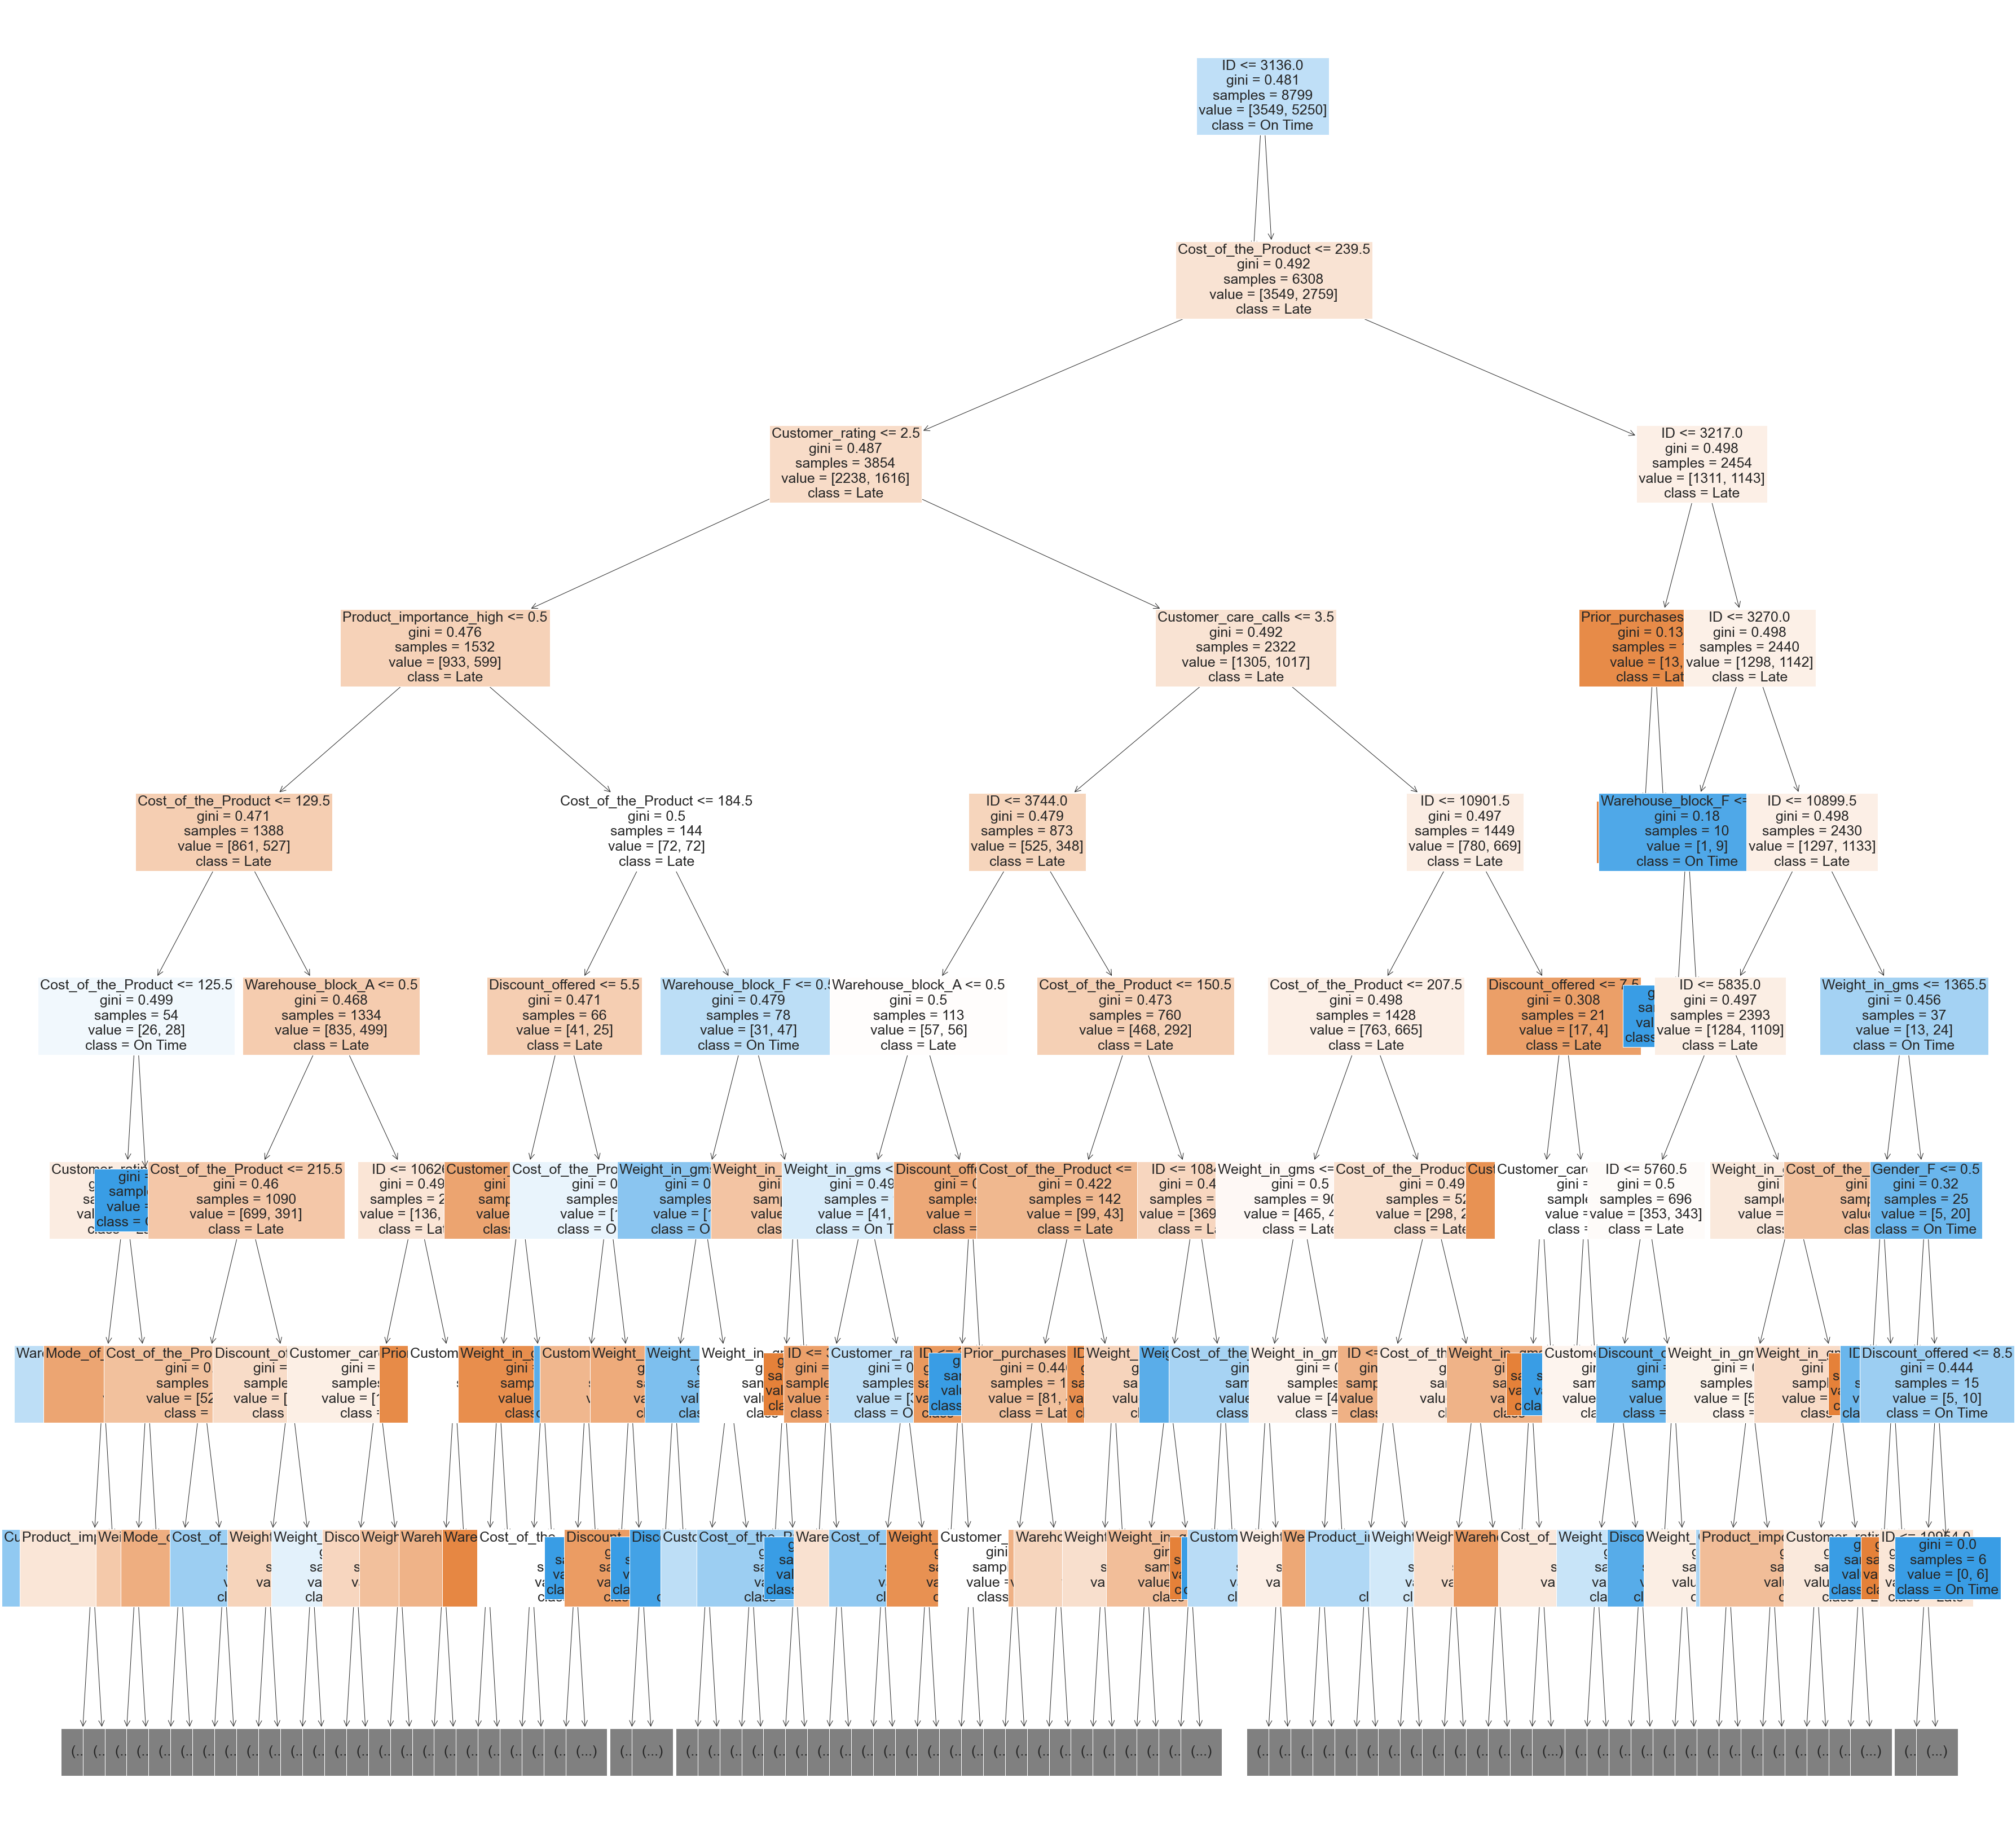

In [87]:
## YOUR CODE HERE
from sklearn import tree

fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(clf,
                   max_depth = 8,
                   feature_names=X_dev.columns,  
                   class_names=['Late', 'On Time'],
                   filled=True,
                  fontsize = 25)

# fig.savefig("decistion_tree.png")


**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [88]:
## YOUR CODE HERE

path = clf.cost_complexity_pruning_path(X_dev, y_dev)
alphas = path['ccp_alphas']

In [89]:
from sklearn.metrics import accuracy_score
accuracy_dev, accuracy_test = [], []
for a in alphas:
    tree = DecisionTreeClassifier(ccp_alpha = a)
    tree.fit(X_dev, y_dev)
    y_pred_dev = tree.predict(X_dev)
    y_pred_test = tree.predict(X_test)
    accuracy_dev.append(accuracy_score(y_dev, y_pred_dev))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))
    


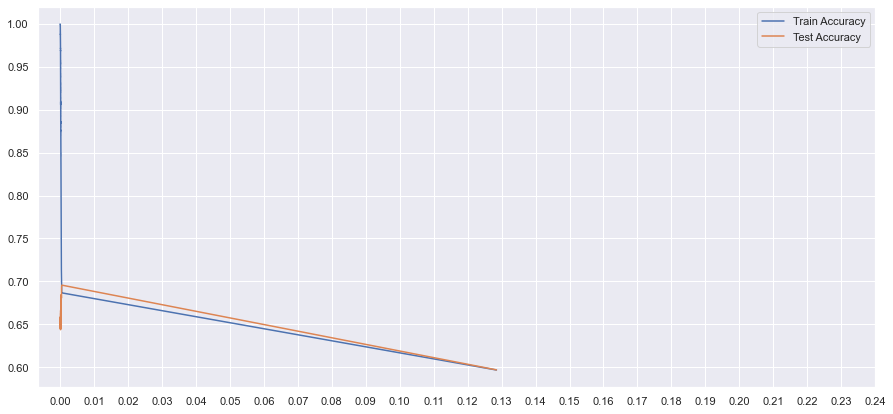

In [92]:
sns.set()
plt.figure(figsize =(15,7))
sns.lineplot(y = accuracy_dev, x = alphas, label = "Train Accuracy")
sns.lineplot(y = accuracy_test, x = alphas, label = "Test Accuracy")
plt.xticks(ticks = np.arange(0.00, 0.25, 0.01))
plt.show()

In [24]:
alpha = alphas[np.argmax(accuracy_test)]
print("Max Test Accuracy: ", max(accuracy_test), "For alpha = ", alpha)

Max Test Accuracy:  0.6954545454545454 For alpha =  0.000477948670739331


In [25]:
tree = DecisionTreeClassifier(ccp_alpha = alpha)
tree.fit(X_dev, y_dev)
y_pred = tree.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy score: 0.6954545454545454
F1-score: 0.6578140960163432


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

<BarContainer object of 19 artists>

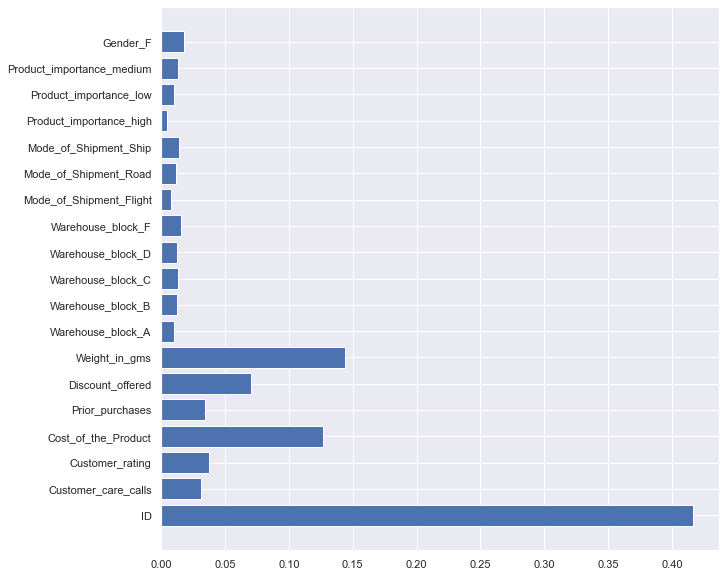

In [26]:
## YOUR CODE HERE
plt.figure(figsize =(10,10))
plt.barh(X_dev.columns, clf.feature_importances_)


In [27]:
print("Top 3 features are: Weight_in_gms, Cost_of_the_Product and Discount_offered.")

Top 3 features are: Weight_in_gms, Cost_of_the_Product and Discount_offered.


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [29]:
## YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()  
rfc.fit(X_dev, y_dev)
y_pred = rfc.predict(X_test)
from sklearn import metrics  
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))

Accuracy:  0.6668181818181819
F1-score:  0.6863500213949508


In [30]:
print("The accuracy for this model is better but the F1-score is slightly less.")

The accuracy for this model is better but the F1-score is slightly less.


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [31]:
## YOUR CODE HERE
all_pure = True
for tree in rfc.estimators_:
    for node in tree.tree_.children_left:
        # If the left and right nodes of a given node are not pure, then the tree is not pure.
        if (tree.tree_.children_left[node] != -1 and tree.tree_.value[node][0][0] != tree.tree_.value[tree.tree_.children_left[node]][0][0]) or (tree.tree_.children_right[node] != -1 and tree.tree_.value[node][0][0] != tree.tree_.value[tree.tree_.children_right[node]][0][0]):
            all_pure = False
            break

if all_pure:
    print("All trees have pure leaves.")
else:
    print("Not all trees have pure leaves.")

Not all trees have pure leaves.


In [32]:
import warnings

tree_accuracy = []
for i, tree in enumerate(rfc.estimators_):
    tree_predictions = tree.predict(X_test)
    tree_accuracy.append(accuracy_score(y_test, tree_predictions))
    warnings.filterwarnings("ignore")

mean_accuracy = np.mean(tree_accuracy)
print(f"Mean Accuracy of All Trees: {mean_accuracy}")
if mean_accuracy < 1.0:
    print("Since mean accuracy does not equal 1, hence not all trees are pure.")
elif mean_accuracy == 1:
    print("Since mean accuracy equals 1, hence all trees are pure.")

Mean Accuracy of All Trees: 0.6486318181818181
Since mean accuracy does not equal 1, hence not all trees are pure.


/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [33]:
## YOUR SOLUTION HERE

print("If I had to choose only two hyperparameters to tune in a random forest classifier, I would choose n_estimators and max_depth.\n") 
print("n_estimators: This hyperparameter determines the number of trees in the random forest. Increasing the number of trees typically improves the performance of the model up to a certain point where further increases in the number of trees no longer provide significant improvements in performance.\n") 
print("max_depth: This hyperparameter determines the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex interactions in the data, but can also lead to overfitting. By tuning this hyperparameter, we can control the complexity of the individual trees, and prevent the random forest from overfitting to the training data.")

If I had to choose only two hyperparameters to tune in a random forest classifier, I would choose n_estimators and max_depth.

n_estimators: This hyperparameter determines the number of trees in the random forest. Increasing the number of trees typically improves the performance of the model up to a certain point where further increases in the number of trees no longer provide significant improvements in performance.

max_depth: This hyperparameter determines the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex interactions in the data, but can also lead to overfitting. By tuning this hyperparameter, we can control the complexity of the individual trees, and prevent the random forest from overfitting to the training data.


**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [34]:
## YOUR SOLUTION HERE
print("I would randomly choose 5 values each for n_estimators and max_depth.\n")
print("n_estimators: We can start by choosing a wide range of values for n_estimators, spanning several orders of magnitude. For example, we could choose values like 10, 100, 500, 1000, and 5000. These values cover a wide range of possibilities, from a small number of trees to a very large number of trees.\n")
print("max_depth: For max_depth, we can choose values that cover a range of possible depths. For example, we could choose values like 5, 10, 15, 20, and 25. These values cover a range of possible tree depths, from shallow trees to deep trees.")

I would randomly choose 5 values each for n_estimators and max_depth.

n_estimators: We can start by choosing a wide range of values for n_estimators, spanning several orders of magnitude. For example, we could choose values like 10, 100, 500, 1000, and 5000. These values cover a wide range of possibilities, from a small number of trees to a very large number of trees.

max_depth: For max_depth, we can choose values that cover a range of possible depths. For example, we could choose values like 5, 10, 15, 20, and 25. These values cover a range of possible tree depths, from shallow trees to deep trees.


**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [35]:
## YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 100, 500, 1000, 5000],
    'max_depth': [10, 15, 20, 25, 40]
}

rfc = RandomForestClassifier(oob_score=True)

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_dev, y_dev)

best_model = grid_search.best_estimator_

print("OOB error of the best model: ", 1 - best_model.oob_score_)

OOB error of the best model:  0.3228775997272417


In [36]:
grid_search.best_score_

0.6799634348028322

In [37]:
d, e = grid_search.best_params_.values()
print("Max depth = ", d, "\nNo of estimators = ", e)

Max depth =  10 
No of estimators =  5000


In [38]:
rfc = RandomForestClassifier(max_depth = d, n_estimators = e, random_state = 42)
rfc.fit(X_dev, y_dev)
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_dev)
print("Training accuracy: ", metrics.accuracy_score(y_dev, y_pred_train))
print("Training f1 score: ", f1_score(y_dev, y_pred_train))
print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Testing f1 score: ", f1_score(y_test, y_pred_test))

Training accuracy:  0.811683145812024
Training f1 score:  0.8128318084265221
Testing accuracy:  0.6954545454545454
Testing f1 score:  0.67444120505345


In [39]:
print("Yes the accuracy has improved slightly.")

Yes the accuracy has improved slightly.


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [40]:
## YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = e, max_depth = d)  
rfc.fit(X_dev, y_dev)
y_pred = rfc.predict(X_test)


<BarContainer object of 19 artists>

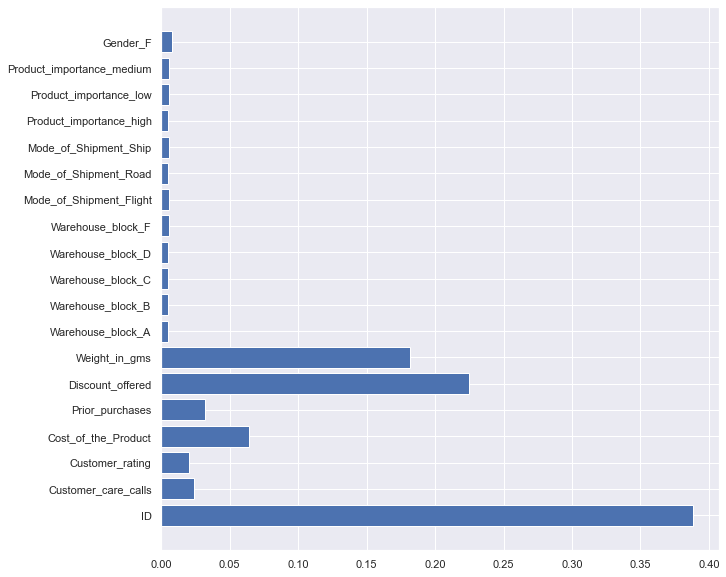

In [41]:
plt.figure(figsize =(10,10))
plt.barh(X_dev.columns, rfc.feature_importances_)

In [42]:
print("The top 3 features are: Weight_in_gms, Discount_offered, and Cost_of_the_Product")

The top 3 features are: Weight_in_gms, Discount_offered, and Cost_of_the_Product


In [43]:
print("For decision tree classifier, the order of importance for the top 3 features was: \nweight_in_gms>Cost_of_product>Discount_offered.\n\nFor Random Forest Classifier, the order of importance for the top 3 features is: \nDiscount_offered>weight_in_gms>Cost_of_product.")

For decision tree classifier, the order of importance for the top 3 features was: 
weight_in_gms>Cost_of_product>Discount_offered.

For Random Forest Classifier, the order of importance for the top 3 features is: 
Discount_offered>weight_in_gms>Cost_of_product.


## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [44]:
## YOUR CODE HERE

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_digits
import time

param_grid = {
    'max_depth': [1, 2, 5],
    'max_leaf_nodes': [5, 10, 15],
    'learning_rate': [0.025, 0.05, 0.1]
}

hgb = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(hgb, param_grid, cv=5)

start_time = time.time()

grid_search.fit(X_dev, y_dev)

elapsed_time = time.time() - start_time

best_model = grid_search.best_estimator_

y_pred_hgb = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_hgb)

# Print the results
print("Time taken for model selection: {:.2f} seconds".format(elapsed_time))
print("Best hyperparameters: ", grid_search.best_params_)
print("Test accuracy of the best model: ", test_accuracy * 100)


Time taken for model selection: 10.31 seconds
Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 1, 'max_leaf_nodes': 5}
Test accuracy of the best model:  69.5909090909091


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT NEED** to choose the same hyperparameters as HistGradientBoostingClassifier.

In [45]:
## YOUR CODE HERE

! pip install xgboost
import xgboost as xgb

In [46]:
param_grid = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [5, 10, 15]
}

xgb_clf = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)

start_time = time.time()

grid_search.fit(X_dev, y_dev)

elapsed_time = time.time() - start_time

best_model = grid_search.best_estimator_

y_pred_xgb = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Time taken for model selection: {:.2f} seconds".format(elapsed_time))
print("Best hyperparameters: ", grid_search.best_params_)
print("Test accuracy of the best model: ", (test_accuracy * 100))


Time taken for model selection: 5.62 seconds
Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 15}
Test accuracy of the best model:  69.04545454545455


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

In [47]:
## YOUR CODE HERE

from sklearn.metrics import classification_report

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Get classification report for HistGradientBoostingClassifier
print("Classification Report for HistGradientBoostingClassifier:")
print(classification_report(y_test, y_pred_hgb))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.57      0.96      0.71       887
           1       0.95      0.51      0.66      1313

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.80      0.69      0.68      2200

Classification Report for HistGradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       887
           1       1.00      0.49      0.66      1313

    accuracy                           0.70      2200
   macro avg       0.79      0.75      0.69      2200
weighted avg       0.83      0.70      0.69      2200



In [48]:
print("XGBoost has a higher accuracy, precision, recall and f1 score than HistGradientBoostingClassifier and it took less time to select the model. Clearly, XGBoost is the preferred choice.")

XGBoost has a higher accuracy, precision, recall and f1 score than HistGradientBoostingClassifier and it took less time to select the model. Clearly, XGBoost is the preferred choice.


**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [49]:
## YOUR CODE HERE

xgb_clf = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 15)
# xgb_clf = xgb.XGBClassifier(random_state = 40)
xgb_clf.fit(X_dev, y_dev)

y_pred_xgb = xgb_clf.predict(X_test)

importances = xgb_clf.get_booster().get_score()

importances_list = [(k, v) for k, v in importances.items()]

importances_list.sort(key=lambda x: x[1], reverse=True)

print("Top 3 important features:")
for i in range(1,4):
    print(importances_list[i][0])
    

Top 3 important features:
Cost_of_the_Product
Weight_in_gms
Customer_rating


<BarContainer object of 19 artists>

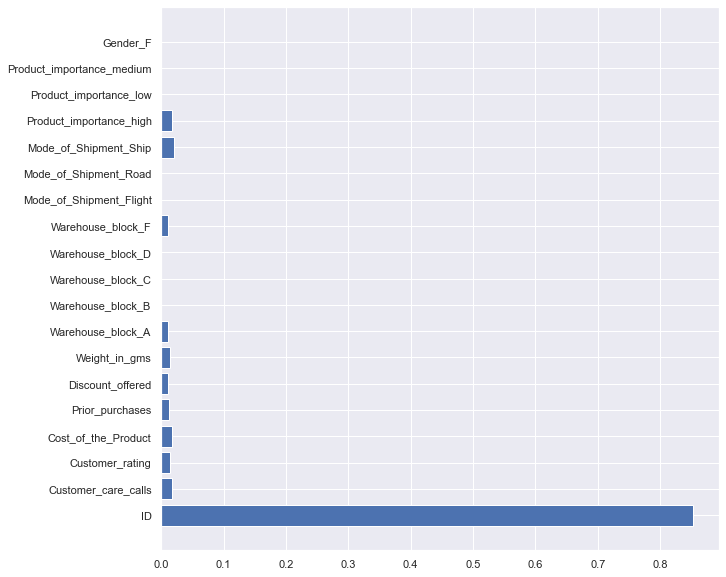

In [50]:
plt.figure(figsize =(10,10))
plt.barh(X_dev.columns, xgb_clf.feature_importances_)

In [51]:
print("Top 3 features are: Cost_of_the_product, Customer_rating and Weight_in_gms.")

Top 3 features are: Cost_of_the_product, Customer_rating and Weight_in_gms.


In [53]:
print("The difference being that Discount_offered doesn't have an impact here and the intensity with which the features impact the predictions is not very high.")

The difference being that Discount_offered doesn't have an impact here and the intensity with which the features impact the predictions is not very high.


**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [54]:
## YOUR CODE HERE

new_features = []
for i in range(1,6):
    new_features.append(importances_list[i][0])
param_grid = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [5, 10, 15]}

xgb_clf = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)

start_time = time.time()

grid_search.fit(X_dev[new_features], y_dev)

elapsed_time = time.time() - start_time

best_model = grid_search.best_estimator_

y_pred_xgb = best_model.predict(X_test[new_features])

test_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Time taken for model selection: {:.2f} seconds".format(elapsed_time))
print("Best hyperparameters: ", grid_search.best_params_)
print("Test accuracy of the best model: ",(test_accuracy * 100))


Time taken for model selection: 3.35 seconds
Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 15}
Test accuracy of the best model:  69.27272727272728


In [55]:
print("Yes the accuracy has increased in this case.")

Yes the accuracy has increased in this case.


## Question 4: Calibration

**4.1: Estimate the brier score for the HistGradientBoosting model (trained with optimal hyperparameters from Q3.1) scored on the test dataset.**

In [56]:
## YOUR CODE HERE

from sklearn.metrics import brier_score_loss

hgb = HistGradientBoostingClassifier(random_state=42, learning_rate = 0.05, max_depth = 1, max_leaf_nodes = 5)

hgb.fit(X_dev, y_dev)

y_pred = hgb.predict_proba(X_test)[:, 1]  # Use the predicted probabilities of class 1

brier_score = brier_score_loss(y_test, y_pred)

print("Brier score on test set: ",(brier_score))

Brier score on test set:  0.17348439803540522


**4.2: Calibrate the trained HistGradientBoosting model using Platt Scaling. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

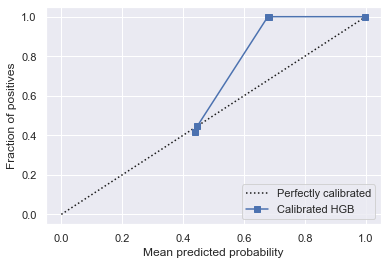

In [65]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve, CalibrationDisplay

X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = 42)
cal_hgb = CalibratedClassifierCV(hgb, cv = "prefit", method = "sigmoid")
cal_hgb.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(cal_hgb, X_test, y_test, n_bins = 100, name = "Calibrated HGB")

In [66]:
calibrated_yhat = cal_hgb.predict_proba(X_test)
brier_loss = brier_score_loss(y_test, calibrated_yhat[:,1])
print("Brier score after calibration: ", brier_loss)

Brier score after calibration:  0.17348425082372573


**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

In [67]:
## YOUR CODE HERE

print("The new brier score is better from the previous brier score by ", brier_score - brier_loss)
print("Clearly calibration methods help in having better predicted probabilities.")

The new brier score is better from the previous brier score by  1.4721167948539282e-07
Clearly calibration methods help in having better predicted probabilities.
